In [1]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# If notebook is in /notebooks, repo root is one level up
PROJECT_ROOT = Path.cwd().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

print("PROJECT_ROOT:", PROJECT_ROOT)
print("src exists:", (PROJECT_ROOT / "src").exists())


PROJECT_ROOT: C:\Users\Acer\OneDrive\Desktop\New folder\Predicting-Customer-Churn-in-Telecom-_v1
src exists: True


In [2]:
from src.config import DATA_PROCESSED
from src.model_training import make_split, score_proba
from src.metrics import precision_recall_lift_at_k, lift_curve
import joblib

In [3]:
from src.config import MODELS_DIR


In [4]:
df = pd.read_csv(DATA_PROCESSED)
split = make_split(df, test_size=0.2, random_state=42)

In [5]:
model = joblib.load(MODELS_DIR / "logistic_regression.pkl")

In [6]:
proba = score_proba(model, split.X_test)
y = split.y_test

m10 = precision_recall_lift_at_k(y, proba, 0.10)
m20 = precision_recall_lift_at_k(y, proba, 0.20)
m10, m20

({'baseline': 0.2654364797728886,
  'precision_k': 0.7730496453900709,
  'recall_k': 0.2914438502673797,
  'lift_k': 2.912371525012326,
  'k': 141},
 {'baseline': 0.2654364797728886,
  'precision_k': 0.6879432624113475,
  'recall_k': 0.5187165775401069,
  'lift_k': 2.5917434672128037,
  'k': 282})

In [7]:
ks = [0.01, 0.02, 0.05, 0.10, 0.20, 0.30]
curve = lift_curve(y, proba, ks)
curve

[(0.01, 3.5162210338680926),
 (0.02, 3.1178314586022493),
 (0.05, 3.183701137305114),
 (0.1, 2.912371525012326),
 (0.2, 2.5917434672128037),
 (0.3, 2.208771064841152)]

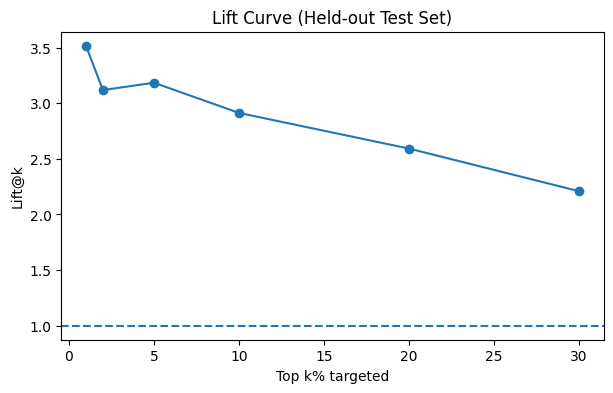

In [8]:
# Plot Lift Curve
xs = [k*100 for k, _ in curve]
ys = [l for _, l in curve]

plt.figure(figsize=(7,4))
plt.plot(xs, ys, marker="o")
plt.axhline(1.0, linestyle="--")
plt.title("Lift Curve (Held-out Test Set)")
plt.xlabel("Top k% targeted")
plt.ylabel("Lift@k")
plt.show()

In [9]:
# If Lift@10% < 1 but Lift@5% > 1, consider targeting Top 5% first.
best_k = max(curve, key=lambda t: t[1])
print("Best k:", best_k[0], "Lift:", best_k[1])

Best k: 0.01 Lift: 3.5162210338680926
